## Basic Image Classification using the inbuilt Fashion_mnist dataset of Keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion = keras.datasets.fashion_mnist
(x_train_full, y_train_full),(x_test,y_test) = fashion.load_data()

#### showing image using visuals

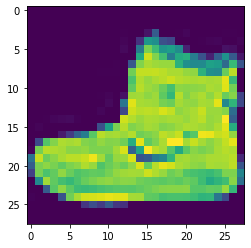

In [4]:
plt.imshow(x_train_full[0])

In [5]:
#normalizing the data by dividing by the pixel intensity 
x_train_n = x_train_full/255.0
x_test_n = x_test/255.0

In [6]:
#split the data into train,test and validation datasets
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

In [7]:
# set seed to ensure repeated results anytime
np.random.seed(46)
tf.random.set_seed(46)

In [8]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
#creating a sequencial API model in Keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
#weights are assigned randomly for initialization from the theory, where weight and biases are differenciated using back
#propagation...so here to get info on the weight and biases on our model by passing the index of the layer we need
weights, biases = model.layers[1].get_weights()


In [12]:
weights

array([[ 3.4232996e-02, -3.7044283e-02, -1.0427907e-02, ...,
        -6.1025098e-03, -5.6596596e-02,  5.6649923e-02],
       [-3.0903634e-02,  3.1786643e-02, -6.1759800e-03, ...,
         7.4128196e-02, -2.9613171e-02, -3.4054693e-02],
       [-3.4505785e-02, -6.9819704e-02, -1.4161974e-02, ...,
        -1.7813664e-02, -4.3614581e-03, -3.0116338e-02],
       ...,
       [-2.6245195e-02,  3.5921127e-02, -4.9729723e-02, ...,
        -4.4615917e-02, -3.7304003e-02, -2.4197023e-02],
       [-5.4970548e-02,  4.9874857e-02,  4.4700935e-02, ...,
        -1.6728394e-02,  1.7833322e-02, -5.3092837e-05],
       [ 3.0553222e-02, -4.1447848e-02,  1.4480986e-02, ...,
         6.0242489e-02,  1.2412168e-02, -7.1373209e-03]], dtype=float32)

In [13]:
weights.shape

(784, 300)

In [14]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
#learning processes
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [16]:
#fitting the x_train and y_train data
model_history = model.fit(x_train, y_train, epochs = 30,
                         validation_data = (x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7069 - accuracy: 0.7706 - val_loss: 0.5082 - val_accuracy: 0.8292
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4848 - accuracy: 0.8319 - val_loss: 0.4492 - val_accuracy: 0.8418
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4400 - accuracy: 0.8464 - val_loss: 0.4046 - val_accuracy: 0.8644
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4144 - accuracy: 0.8540 - val_loss: 0.4111 - val_accuracy: 0.8558
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3947 - accuracy: 0.8603 - val_loss: 0.3873 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3780 - accuracy: 0.8666 - val_loss: 0.3709 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3647 - accuracy: 0.8713 - val_loss: 0.3815 - val_accuracy:

In [17]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [18]:
history = model_history.history

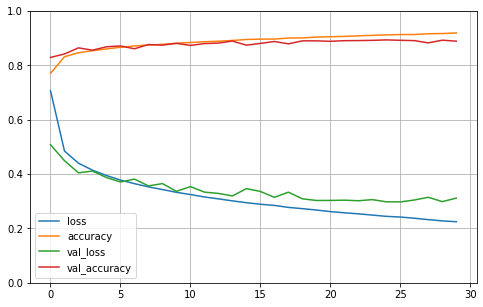

In [19]:
pd.DataFrame(history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

<function matplotlib.pyplot.show(close=None, block=None)>

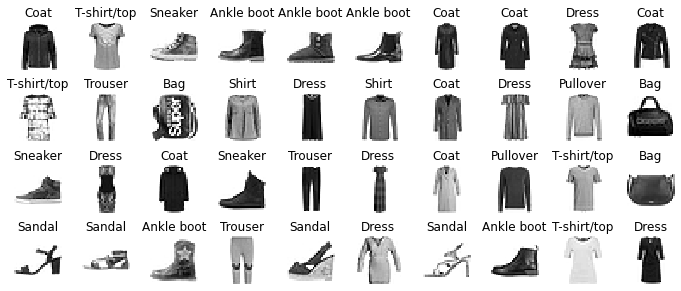

In [21]:
n_rows = 4
n_cols = 10
plt.figure(figsize = (n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap = "binary", interpolation= "nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize = 12)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show

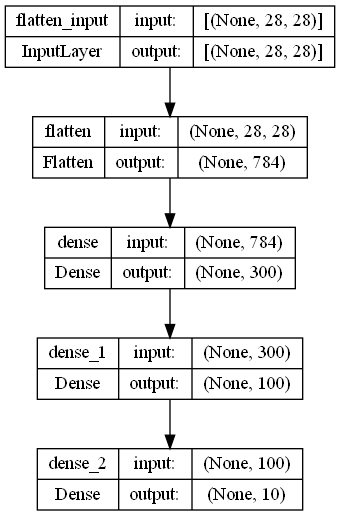

In [22]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes= True)

In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3429 - accuracy: 0.8799


[0.3428514301776886, 0.8798999786376953]

In [24]:
X_new = x_test[:3]

In [25]:
model.predict(X_new).round(2)

1/1 [==============================] - 0s 78ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)